In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 깨짐 방지
plt.rcParams['font.family'] = 'Malgun Gothic'  
plt.rcParams['axes.unicode_minus'] = False

In [114]:
df = pd.read_csv('./data/merged_df.csv')
df.columns

Index(['character_name', 'character_date_create', 'character_create_type_name',
       'character_class_name', 'character_nation_name', 'character_gender',
       'character_exp', 'character_level', 'server_name', 'job', 'ocid', '힘',
       '지력', '지혜', '건강', '민첩', '체력치', '마력치'],
      dtype='object')

In [115]:
df.shape

(550, 18)

In [116]:
df.head(2)

,character_name,character_date_create,character_create_type_name,character_class_name,character_nation_name,character_gender,character_exp,character_level,server_name,job,ocid,힘,지력,지혜,건강,민첩,체력치,마력치
0,포맨,2015-10-18T02:20:37.25Z,캐릭터_일반,전사,부여,M,2.664212e+18,899,연,전사,d3c2bda905bda4fcdbf9a3b30972a233,1348,497,387,565,720,22731261,4746820
1,신이내린한분,2008-09-03T10:04:19Z,캐릭터_일반,전사,고구려,M,8.588192e+15,899,연,전사,6b7a4d4d779c8d55ea92ec4ae0ac14f5efe8d04e6d233b...,1228,614,430,523,709,21260856,4957741


### 분석 목표에 불필요한 컬럼 제거
#### 분석 목표 : <span style="color:orange">**뉴비가 시작하기에 효율이 좋은 직업**</span>

- 제거 대상 : character_gender, character_class_name (job 컬럼이 존재)

In [117]:
df = df.drop(['character_gender', 'character_class_name'], axis=1)

### 순위 재설정
- 현재 데이터는 서버의 직업별 상위 10명의 랭커들을 수집한 데이터
- 절대적인 순위의 척도로 **<span style="color:orange">character_exp</span>** 를 통해 재설정
- 컬럼 이름 : <span style="color:orange">**character_rank**</span>

In [118]:
# drop 'character_create_type_name' nunique = 1
df = df.drop('character_create_type_name', axis=1)

# character_exp NaN drop
df = df.dropna(subset=['character_exp'])

# define character_rank
# character_level이 높을수록, 경험치가 많을수록 상위 순위
df.sort_values(by=['character_level','character_exp'], ascending=[False, False], inplace=True)
df.reset_index(drop=True, inplace=True)
df['character_rank'] = df.index + 1

In [119]:
df.head(2)

,character_name,character_date_create,character_nation_name,character_exp,character_level,server_name,job,ocid,힘,지력,지혜,건강,민첩,체력치,마력치,character_rank
0,장동건,2014-10-07T14:23:05.75Z,고구려,3.435641e+18,899,무휼,천인,f5c7c2de093f397e3131242eea5e4ec49c4668c7065013...,724,1143,495,345,557,10353662,8559029,1
1,강산,2021-08-09T13:27:16Z,부여,2.958403e+18,899,유리,주술사,8539794a0d45cb494ae006e185475cee35dacb1bd07330...,530,1288,530,384,677,12455659,11291944,2


### 1. 상위 200등 이내에 어떤 직업군과 서버가 존재하는지 파악

In [120]:
# 상위 200등 필터링
df_top200 = df.head(200)

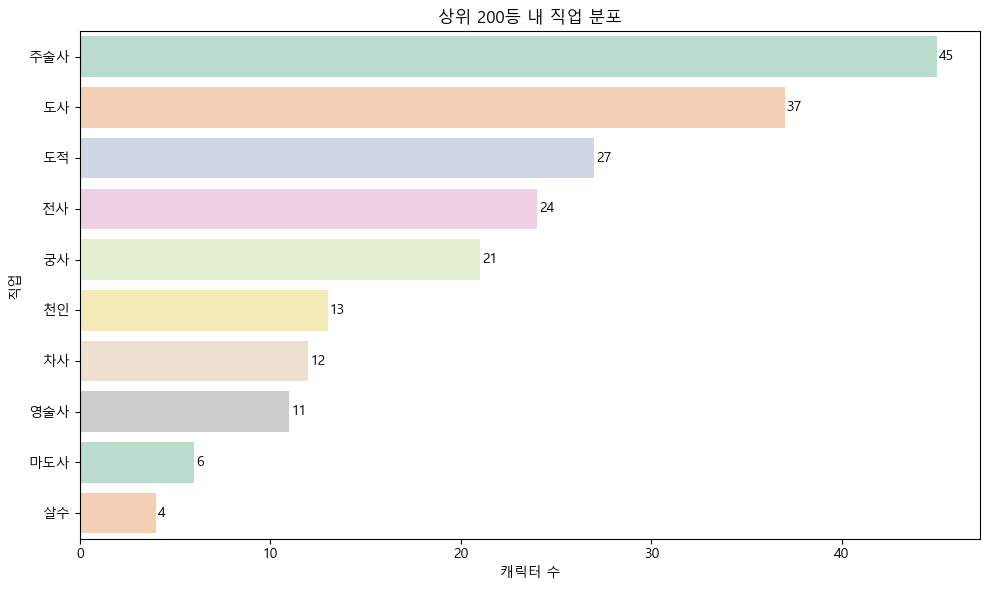

In [121]:
# 상위 200등 내 직업별 분포 시각화

plt.figure(figsize=(10, 6))
job_counts = df_top200['job'].value_counts()
ax = sns.barplot(x=job_counts.values, y=job_counts.index, palette='Pastel2')
plt.title('상위 200등 내 직업 분포')
plt.xlabel('캐릭터 수')
plt.ylabel('직업')

## 각 바 끝에 수치 표시
for i, j in enumerate(job_counts.values):
    ax.text(j + 0.1, i, str(j), va='center')
plt.tight_layout()
plt.show()


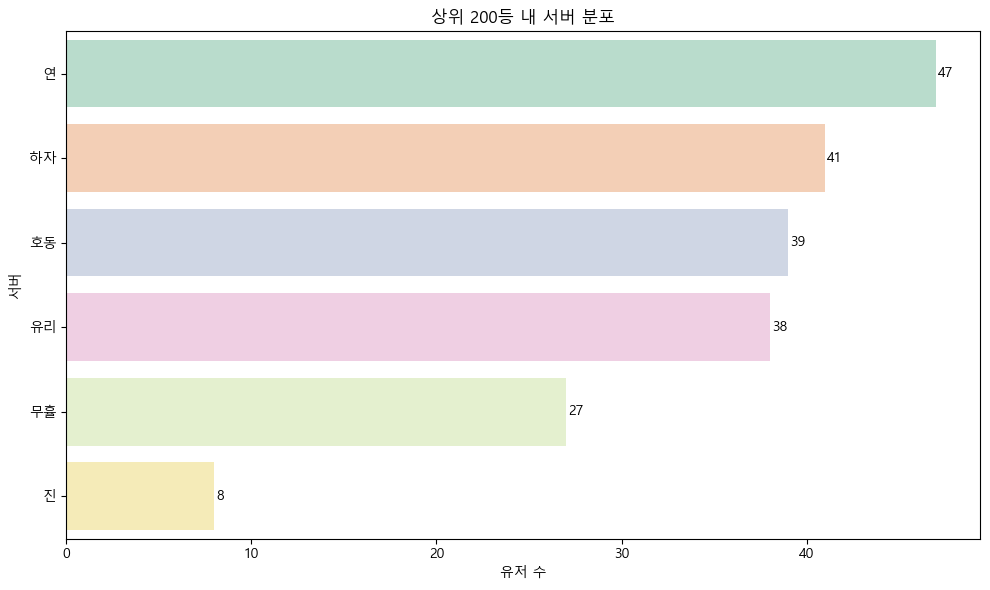

In [123]:
# 2. 서버 분포
plt.figure(figsize=(10, 6))
server_counts = df_top200['server_name'].value_counts()
ax = sns.barplot(x=server_counts.values, y=server_counts.index, palette='Pastel2')
plt.title('상위 200등 내 서버 분포')
plt.xlabel('유저 수')
plt.ylabel('서버')

## 각 바 끝에 수치 표시
for i, j in enumerate(server_counts.values):
    ax.text(j + 0.1, i, str(j), va='center')
plt.tight_layout()
plt.show()

In [124]:
df.head(1)

,character_name,character_date_create,character_nation_name,character_exp,character_level,server_name,job,ocid,힘,지력,지혜,건강,민첩,체력치,마력치,character_rank
0,장동건,2014-10-07T14:23:05.75Z,고구려,3.435641e+18,899,무휼,천인,f5c7c2de093f397e3131242eea5e4ec49c4668c7065013...,724,1143,495,345,557,10353662,8559029,1
